# Data Cleaning Basics

## Step 1: Reading Data
Data can be read from various file formats such as CSV, JSON, and Excel files. Read more about it [here](https://www.prowesstics.com/blogs/python-data-file-formats/) 

This code demonstrates how to load and customize a dataset using the Pandas library. It shows how to read a full CSV file into a DataFrame or, alternatively, import only specific columns using the `usecols` parameter to focus on relevant data like year, leading cause, and number of deaths. Another option illustrated is how to remove unnecessary columns after loading the dataset using the `drop()` method to streamline the data for analysis.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("NYC_Leading_Death_Causes.csv")

# If we want to upload only certain columns of the dataset --- example Year, Leading Cause and Deaths
#new_df = pd.read_csv('NYC_Leading_Death_Causes.csv', usecols = ['Year','Leading Cause', 'Deaths'])

# OR
# pandas drop columns using list of column names 
#new_df = df.drop(['Sex','Death Rate', 'Age Adjusted Death Rate'], axis=1)

## Step 2: Exploring Data

The `describe()` function is used to generate summary statistics for all numerical columns in the dataset. It provides useful metrics such as count, mean, standard deviation, minimum and maximum values, as well as the 25th, 50th (median), and 75th percentiles. This summary offers a quick overview of the distribution, central tendency, and variability of the numerical data, helping identify patterns or potential outliers.

In [4]:
# to get summary statistics of data(all numerical columns ONLY)
df.describe()

Year
count  1096.000000
mean   2010.474453
std       2.292191
min    2007.000000
25%    2008.000000
50%    2010.000000
75%    2012.000000
max    2014.000000

The `shape` attribute is used to find the number of rows and columns in a DataFrame. It returns a tuple where the first value represents the number of rows and the second value represents the number of columns. This provides a quick way to understand the overall size and structure of the dataset.

In [5]:
# find the number of rows and columns of data frame
df.shape

(1096, 7)

By default, `head()` returns the top 5 rows, but specifying a number in parentheses lets you control how many rows are shown. So, the `head(10)` function displays the first 10 rows of the DataFrame, allowing you to quickly view a sample of the dataset.  This is helpful for getting an initial look at the data's structure, column names, and sample values.

In [6]:
# print top 10 rows of the dataframe. "head()" will print top 5 rows
df.head(10)

Year                                      Leading Cause Sex  \
0  2010            Influenza (Flu) and Pneumonia (J09-J18)   F   
1  2008  Accidents Except Drug Posioning (V01-X39, X43,...   F   
2  2013  Accidents Except Drug Posioning (V01-X39, X43,...   M   
3  2010          Cerebrovascular Disease (Stroke: I60-I69)   M   
4  2009                 Assault (Homicide: Y87.1, X85-Y09)   M   
5  2012  Mental and Behavioral Disorders due to Acciden...   F   
6  2012          Cerebrovascular Disease (Stroke: I60-I69)   F   
7  2009  Essential Hypertension and Renal Diseases (I10...   M   
8  2010                                   All Other Causes   F   
9  2009                          Alzheimer's Disease (G30)   F   

               Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
0                    Hispanic    228       18.7                    23.1  
1                    Hispanic     68        5.8                     6.6  
2          White Non-Hispanic    271       20.1                    17.9  
3                    Hispanic    140       12.3                    21.4  
4          Black Non-Hispanic    255         30                      30  
5       Other Race/ Ethnicity      .          .                       .  
6  Asian and Pacific Islander    102       17.5                    20.7  
7  Asian and Pacific Islander     26        5.1                     7.2  
8          White Non-Hispanic   2140      149.7                    93.9  
9       Other Race/ Ethnicity      .          .                       .

By default, `tail()` shows the last 5 rows, but you can specify any number inside the parentheses to customize how many rows you want to see. SO, the `tail(12)` function displays the last 12 rows of the DataFrame, giving you a look at the most recent or bottom entries in the dataset.  This is useful for reviewing the end of the dataset, checking for missing data, or understanding how the data concludes.

In [7]:
#display last 5 rows / for displaying any other number of last rows, put value inside ();ex tail(10)
df.tail(12)

Year                                      Leading Cause Sex  \
1084  2008  Nephritis, Nephrotic Syndrome and Nephrisis (N...   F   
1085  2014       Chronic Lower Respiratory Diseases (J40-J47)   F   
1086  2007  Human Immunodeficiency Virus Disease (HIV: B20...   F   
1087  2010                              Atherosclerosis (I70)   F   
1088  2014                                   All Other Causes   F   
1089  2009  Nephritis, Nephrotic Syndrome and Nephrisis (N...   F   
1090  2008     Chronic Liver Disease and Cirrhosis (K70, K73)   F   
1091  2012            Influenza (Flu) and Pneumonia (J09-J18)   F   
1092  2014  Accidents Except Drug Posioning (V01-X39, X43,...   F   
1093  2009              Malignant Neoplasms (Cancer: C00-C97)   M   
1094  2009    Intentional Self-Harm (Suicide: X60-X84, Y87.0)   M   
1095  2013  Essential Hypertension and Renal Diseases (I10...   M   

                  Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
1084  Asian and Pacific Islander     13        2.4                     3.3  
1085          Not Stated/Unknown     12          .                       .  
1086          Black Non-Hispanic    248       23.6                    22.1  
1087          Not Stated/Unknown      .          .                       .  
1088          Black Non-Hispanic   1536      146.4                   126.4  
1089          Black Non-Hispanic     75        7.2                     6.7  
1090       Other Race/ Ethnicity      .          .                       .  
1091          Not Stated/Unknown      6          .                       .  
1092          White Non-Hispanic    169       11.9                     7.4  
1093          White Non-Hispanic   3236      240.5                   205.6  
1094          White Non-Hispanic    191       14.2                      13  
1095          Black Non-Hispanic    148       17.2                    20.9

The `columns` attribute is used to display all the column names in a DataFrame. It returns an index object containing the names of each column, which helps you understand the structure and available variables in the dataset. This is especially useful when working with large datasets or when you want to reference specific columns for further analysis.

In [8]:
# to display all column names
df.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

The `rename()` function is used to change column names in a DataFrame. In the first example, the column `'Sex'` is renamed to `'Gender'`, and the `inplace=True` argument ensures the change is applied directly to the existing DataFrame without needing to assign it to a new variable. The second (commented-out) example shows how to rename multiple columns at once by passing a dictionary where each key is the current column name and each value is the new name. This is especially helpful for making column names more descriptive or easier to work with (e.g., removing spaces or standardizing naming conventions). After renaming, using `df.columns` lets you confirm the changes.

In [9]:
#Rename one column
df.rename(columns = {'Sex':'Gender'}, inplace = True) 
df.columns

# #Rename multiple column
#df.rename(columns = {'Leading Cause':'Leading_Cause', 'Race Ethnicity':'Race_Ethnicity', 
                              #'Death Rate':'Death_Rate', 'Age Adjusted Death Rate': 'Age_Adjusted_Death_Rate'}, inplace = True)

Index(['Year', 'Leading Cause', 'Gender', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

The `count()` function is used to find the number of non-null (non-missing) entries in each column of the DataFrame. It returns a count for every column, helping you identify if there are any missing values. This is useful for quickly checking data completeness and ensuring that columns contain the expected number of entries.

In [10]:
# find the count of rows
df.count()

Year                       1096
Leading Cause              1096
Gender                     1096
Race Ethnicity             1096
Deaths                     1096
Death Rate                 1096
Age Adjusted Death Rate    1096
dtype: int64

The `iloc[:, :]` function is used to print **all rows and all columns** of a DataFrame by index-based selection. The colon before the comma (`:`) selects all rows, and the colon after the comma (`:`) selects all columns. This is helpful when you want to view the entire dataset explicitly, although in practice, large DataFrames may be truncated in the output display for performance reasons.

In [11]:
# print ALL rows and ALL columns by index
df.iloc[:,:]

Year                                      Leading Cause Gender  \
0     2010            Influenza (Flu) and Pneumonia (J09-J18)      F   
1     2008  Accidents Except Drug Posioning (V01-X39, X43,...      F   
2     2013  Accidents Except Drug Posioning (V01-X39, X43,...      M   
3     2010          Cerebrovascular Disease (Stroke: I60-I69)      M   
4     2009                 Assault (Homicide: Y87.1, X85-Y09)      M   
...    ...                                                ...    ...   
1091  2012            Influenza (Flu) and Pneumonia (J09-J18)      F   
1092  2014  Accidents Except Drug Posioning (V01-X39, X43,...      F   
1093  2009              Malignant Neoplasms (Cancer: C00-C97)      M   
1094  2009    Intentional Self-Harm (Suicide: X60-X84, Y87.0)      M   
1095  2013  Essential Hypertension and Renal Diseases (I10...      M   

          Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
0               Hispanic    228       18.7                    23.1  
1               Hispanic     68        5.8                     6.6  
2     White Non-Hispanic    271       20.1                    17.9  
3               Hispanic    140       12.3                    21.4  
4     Black Non-Hispanic    255         30                      30  
...                  ...    ...        ...                     ...  
1091  Not Stated/Unknown      6          .                       .  
1092  White Non-Hispanic    169       11.9                     7.4  
1093  White Non-Hispanic   3236      240.5                   205.6  
1094  White Non-Hispanic    191       14.2                      13  
1095  Black Non-Hispanic    148       17.2                    20.9  

[1096 rows x 7 columns]

This code uses `iloc` to access a specific subset of the DataFrame by integer position. It selects rows from index 100 to 124 (which corresponds to the 101st through 125th rows, since indexing starts at 0) and columns from index 4 to 6 (the 5th, 6th, and 7th columns). This allows you to extract and work with a precise slice of the data based on row and column positions rather than labels.

In [12]:
# Access 101 - 124th rows and 5th, 6th and 7th columns by index. Both Row and Column Index starts from 0
df.iloc[100:125,4:7]

Deaths Death Rate Age Adjusted Death Rate
100   1940      226.8                   280.7
101   3366      234.5                   160.5
102    563       39.7                    20.4
103      .          .                       .
104    180       12.7                     6.7
105      7          .                       .
106     47          .                       .
107      .          .                       .
108     63        5.3                     6.2
109     10          .                       .
110     36          .                       .
111   1230      116.8                   113.4
112    279       26.5                    25.3
113     37        6.7                       8
114      6          .                       .
115   1852      176.5                   148.4
116    530       39.6                    32.9
117     11          .                       .
118    554       96.5                   118.5
119      .          .                       .
120      .          .                       .
121    186       21.5                    21.5
122      .          .                       .
123    235       20.6                    38.9
124   2282      217.7                   194.2

The `loc` accessor is used to select data by label. Here, `df.loc[:, "Leading Cause"]` retrieves **all rows** (`:`) but only the column named `"Leading Cause"`. This method is useful when you want to access one or more columns directly by their names instead of by their integer positions.

In [13]:
# Access columns by column name
df.loc[:,"Leading Cause"]

0                 Influenza (Flu) and Pneumonia (J09-J18)
1       Accidents Except Drug Posioning (V01-X39, X43,...
2       Accidents Except Drug Posioning (V01-X39, X43,...
3               Cerebrovascular Disease (Stroke: I60-I69)
4                      Assault (Homicide: Y87.1, X85-Y09)
                              ...                        
1091              Influenza (Flu) and Pneumonia (J09-J18)
1092    Accidents Except Drug Posioning (V01-X39, X43,...
1093                Malignant Neoplasms (Cancer: C00-C97)
1094      Intentional Self-Harm (Suicide: X60-X84, Y87.0)
1095    Essential Hypertension and Renal Diseases (I10...
Name: Leading Cause, Length: 1096, dtype: object

Here, `df.Year` retrieves the entire `"Year"` column directly using dot notation by referencing the column name as an attribute of the DataFrame. This is a quick and convenient way to access columns with simple names, though it only works when the column name is a valid Python identifier (no spaces or special characters).


In [14]:
# Another way to access columns (by column name)
df.Year

0       2010
1       2008
2       2013
3       2010
4       2009
        ... 
1091    2012
1092    2014
1093    2009
1094    2009
1095    2013
Name: Year, Length: 1096, dtype: int64

The code `df.Leading Cause` attempts to access a column using dot notation, but it will cause an error because the column name contains a space. Dot notation only works for column names that are valid Python identifiers—meaning no spaces or special characters. For columns with spaces (like `"Leading Cause"`), you need to use bracket notation instead, such as `df["Leading Cause"]`.

In [31]:
# Another way to access columns (by column name). The only problem is that it does not work if the
#column name has space between them
df.Leading Cause

SyntaxError: invalid syntax (2577162025.py, line 3)

# Data Cleaning

This code handles duplicate rows in the DataFrame by identifying all rows that are duplicates except for their first occurrence. The `duplicated()` function returns a Boolean series marking True for every duplicate row after the first one based on all columns by default. By using this Boolean series to filter `df`, the code creates a new DataFrame `dupRowsDF` containing only these duplicate rows. Printing `dupRowsDF` lets you see which rows have repeated values across the entire dataset, which is useful for data cleaning and ensuring data quality.

In [16]:
#[A]Handling duplicate rows*******

# Select duplicate rows except first occurrence based on all columns
dupRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(dupRowsDF) 

Duplicate Rows except first occurrence based on all columns are :
     Year                       Leading Cause Gender      Race Ethnicity  \
32   2009  Assault (Homicide: Y87.1, X85-Y09)      M  Black Non-Hispanic   
149  2009  Assault (Homicide: Y87.1, X85-Y09)      M  Black Non-Hispanic   

    Deaths Death Rate Age Adjusted Death Rate  
32     255         30                      30  
149    255         30                      30  


This code removes all duplicate rows from the DataFrame `df` while keeping only the first occurrence of each duplicated row. The `drop_duplicates()` function returns a new DataFrame `df1` without duplicates. The length of this cleaned DataFrame (`len(df1)`) is printed to show how many unique rows remain after duplicates are removed, helping you understand the impact of duplicate data on the dataset size.

In [17]:
### dropping ALL duplicte values except first 
df1 = df.drop_duplicates() 
print(len(df1))

### displaying data 
print("the length of the df after deleting duplicate rows is", len(df1))


1094
the length of the df after deleting duplicate rows is 1094


The `dtypes` attribute is used to find the data types of all columns in the DataFrame `df1`. It returns a series where each column name is paired with its corresponding data type, such as `int64` for integers or `object` for text. This information is important for understanding how data is stored and for choosing appropriate methods for analysis or manipulation.

In [18]:
# find the data types of all columns
df1.dtypes

Year                        int64
Leading Cause              object
Gender                     object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

This code attempts to find the total number of deaths over 8 years by summing the values in the `"Deaths"` column. However, since the `"Deaths"` column is stored as an `object` type (often meaning it's treated as text), using `.sum()` in this case will concatenate the values like strings instead of performing a numeric addition. As a result, the output will be a meaningless string rather than a valid total. To get an accurate sum, the column should first be converted to a numeric data type using `pd.to_numeric()`.

In [19]:
# Find the total number of deaths in 8 years; datatype of "Deaths" column is "object"
# without converting the column to numeric, the matematical operation "sum" returns a garbage result
df1["Deaths"].sum()

'22868271140255.102262140.191281761770.102121..9018313123554845929132610746635616803222.15926271204.5168290281.6..829.229314645124448145155271163846951721464.30052811231.55510214716147.7.12631667.2951912161057.410511627221493319299.449519403366563.180747.6310361230279376185253011554..186.23522826538.297156.5714.526119313755727327581291055651570820461.29019710075.896674535219153218119113.116633627126501621486206192521065620916927722693352222.191138216517.533081824631882522721779337120081784..189371.3639221033121379519109710.2851201..1482212715.115629716250211991543938013375202625418227.228521189764317135742044340266229134111252151316558247135133048.267431422722196130590605351313217063391142831877550.36.75507215108853384951278124615950227266.320112172156145262455..5253514178792991455503155171268.14415115434383028.9882798322210399016518244415850229340155.184398358206742463528312517018689164171245951080.622134205265.952743775.4145571124964507..94718229411876.141418.43629.1540.22551163.1052

This code prepares the `"Deaths"` column for numerical analysis by cleaning and converting its values. First, `df1.replace('.', np.nan)` replaces any occurrences of the string `"."` in the entire DataFrame with `NaN` (Not a Number), which represents missing or undefined values. Then, `pd.to_numeric(df1["Deaths"])` converts the `"Deaths"` column from an object (text) type to a numeric type (`float64` by default), allowing for accurate mathematical operations like summing or averaging. This step is essential when the column contains non-numeric characters that would otherwise interfere with calculations.

In [20]:
#replace "." with "NaN" and change datatype of "Deaths" to float
df1 = df1.replace('.', np.nan)
df1["Deaths"] = pd.to_numeric(df1["Deaths"])

This code calculates the total number of deaths by summing the values in the `"Deaths"` column **after** it has been successfully converted to a numeric data type. Unlike earlier, when the column was stored as an object and resulted in a string concatenation, this time the `.sum()` function performs a proper mathematical operation. The result is the accurate total number of deaths across the dataset, which can now be used for further analysis or reporting.

In [21]:
# Finding the total number of deaths after converting the datatype of "Deaths" column into Numeric, returns correct result
df1["Deaths"].sum()

424998.0

# Data Analysis and Visualization

This code identifies all the unique causes of death listed in the `"Leading Cause"` column. The `.unique()` function returns an array of distinct labels (i.e., categories) found in that column, which helps in understanding the different qualitative or categorical values present in the data. The second line prints the total number of unique causes by using `len(causeDeath)`, which counts how many distinct death causes are represented in the dataset. This is useful for summarizing and preparing for grouped analysis or visualization.

In [22]:
# Find the unique causes of death --- find the unique labels of categorical/qualitative data in the column
causeDeath = df1["Leading Cause"].unique()
print(causeDeath)

# count of unique labels of "leading cause"
print("\n The number of unique causes of deaths are:", len(causeDeath))

['Influenza (Flu) and Pneumonia (J09-J18)'
 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)'
 'Cerebrovascular Disease (Stroke: I60-I69)'
 'Assault (Homicide: Y87.1, X85-Y09)'
 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'
 'Essential Hypertension and Renal Diseases (I10, I12)' 'All Other Causes'
 "Alzheimer's Disease (G30)"
 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'
 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)'
 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
 'Chronic Liver Disease and Cirrhosis (K70, K73)'
 'Malignant Neoplasms (Cancer: C00-C97)'
 'Chronic Lower Respiratory Diseases (J40-J47)'
 'Diabetes Mellitus (E10-E14)'
 'Certain Conditions originating in the Perinatal Period (P00-P96)'
 'Septicemia (A40-A41)' 'Aortic Aneurysm and Dissection (I71)'
 'Mental and Behavioral Disorders due to Use of Alcohol (F10)'
 'Insitu or Benign / Uncertain Neoplasms (D00-D48

This code calculates the total number of deaths using the `groupby()` function to aggregate data based on specific categories. First, it groups the data by `"Year"` and then sums the `"Deaths"` column within each year, showing the total number of deaths for every year in the dataset. This helps reveal trends over time. Next, it groups the data by `"Gender"` (previously renamed from `"Sex"`) and sums the deaths for each gender, giving a comparison of the total number of deaths among males and females. This grouped analysis is useful for identifying patterns and making category-based comparisons in the data.


In [23]:
#FIND THE TOTAL NUMBER OF DEATHS.................using "groupby" function
#By year
totalDeaths_year = df1.groupby("Year")["Deaths"].sum()
print("The total number of deaths every year:\n", totalDeaths_year)

#By Gender
totalDeaths_gender = df1.groupby("Gender")["Deaths"].sum()
print("\n The total number of deaths of males and females are:\n", totalDeaths_gender)

The total number of deaths every year:
 Year
2007    53996.0
2008    54138.0
2009    52820.0
2010    52505.0
2011    52726.0
2012    52420.0
2013    53387.0
2014    53006.0
Name: Deaths, dtype: float64

 The total number of deaths of males and females are:
 Gender
F    217071.0
M    207927.0
Name: Deaths, dtype: float64


This code calculates and visualizes the total number of deaths by race/ethnicity using grouping and sorting techniques. First, it groups the DataFrame by the `"Race Ethnicity"` column and sums the values in the `"Deaths"` column for each group. The `.sort_values(ascending=False)` function then arranges the results in descending order, showing which ethnic groups had the highest to lowest number of deaths. Then, `totalDeaths_Race.plot.bar()` creates a bar chart to visually represent these totals, with a title `"Total number of deaths by Ethnicity"`. This visualization makes it easier to compare death counts across different racial and ethnic groups.


The total number of deaths by Ethnicity:
 Race Ethnicity
White Non-Hispanic            206487.0
Black Non-Hispanic            111116.0
Hispanic                       74802.0
Asian and Pacific Islander     26355.0
Not Stated/Unknown              4099.0
Other Race/ Ethnicity           2139.0
Name: Deaths, dtype: float64


<AxesSubplot:title={'center':'Total number of deaths by Ethnicity'}, xlabel='Race Ethnicity'>

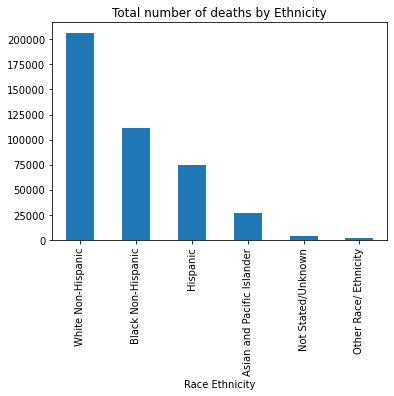

In [24]:
#FIND THE TOTAL NUMBER OF DEATHS.................
#By Race Ethnicity and sort the answers in descending order
totalDeaths_Race = df1.groupby("Race Ethnicity")["Deaths"].sum().sort_values(ascending=False)
print("The total number of deaths by Ethnicity:\n", totalDeaths_Race)

# Make a bar diagram for the total deaths by Race
totalDeaths_Race.plot.bar(title = "Total number of deaths by Ethnicity")

This code calculates the total number of deaths for each **Leading Cause of Death**, identifies the **top 5 causes**, saves the results to a new CSV file, and visualizes them in a bar chart. It groups the dataset by `"Leading Cause"` and sums the deaths in each category. The `.sort_values(ascending=False).head()` part sorts these totals in descending order and selects the top 5 leading causes with the highest death counts. Then, `totalDeaths_LC.to_csv("Deaths_LC.csv")` writes this summarized result to a new CSV file named **"Deaths\_LC.csv"**. Finally, `totalDeaths_LC.plot.bar()` creates a bar chart that visually displays these top 5 causes of death, making it easier to interpret and compare their impact.

<AxesSubplot:xlabel='Leading Cause'>

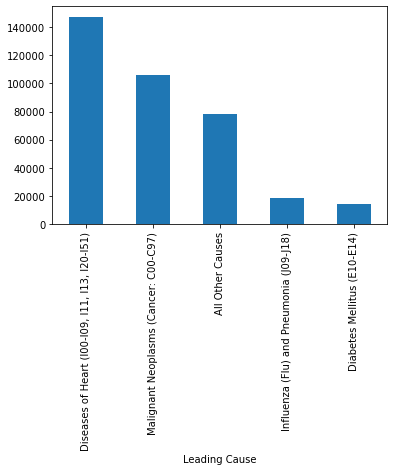

In [25]:
#FIND THE TOTAL NUMBER OF DEATHS.................
# By Leading Cause of Death and write the answer in seperate file "Death_LC.csv". Find only top 5 causes

totalDeaths_LC = df1.groupby("Leading Cause")["Deaths"].sum().sort_values(ascending=False).head()
totalDeaths_LC.to_csv("Deaths_LC.csv") # write the result in another file
totalDeaths_LC.plot.bar()

This code calculates the **number of deaths for each year, broken down by gender** using the `groupby()` function with multiple grouping columns. It groups the DataFrame first by `"Year"` and then by `"Gender"`, and for each combination, it sums the values in the `"Deaths"` column. This results in a multi-level index (also called a hierarchical index) where each row represents the total deaths for a specific gender in a specific year. The final output provides a detailed breakdown of how death counts vary by gender across different years, which is helpful for identifying trends or disparities over time.


In [26]:
#Number of deaths every year by Gender.......
total_lc_gender = df1.groupby(["Year","Gender"])["Deaths"].sum()

print(total_lc_gender)

Year  Gender
2007  F         27749.0
      M         26247.0
2008  F         27816.0
      M         26322.0
2009  F         26941.0
      M         25879.0
2010  F         26675.0
      M         25830.0
2011  F         27075.0
      M         25651.0
2012  F         26766.0
      M         25654.0
2013  F         27133.0
      M         26254.0
2014  F         26916.0
      M         26090.0
Name: Deaths, dtype: float64


This code groups the data by both `"Year"` and `"Gender"` and sums the `"Deaths"` for each combination. The `.unstack('Gender')` method pivots the `"Gender"` level of the grouped data into separate columns—typically one for `"F"` (Female) and one for `"M"` (Male)—creating a table where each row represents a year and each column shows the total deaths by gender. Then, `df2[['F','M']].plot(...)` generates a **stacked bar graph** using these gender-based totals, with bars stacked vertically to show each year's total deaths divided into male and female contributions. The `figsize=(12,6)` ensures the plot is wide and readable, and the title highlights the focus on gender distribution across years.


<AxesSubplot:title={'center':'Gender Distribution in Deaths Each Year'}, xlabel='Year'>

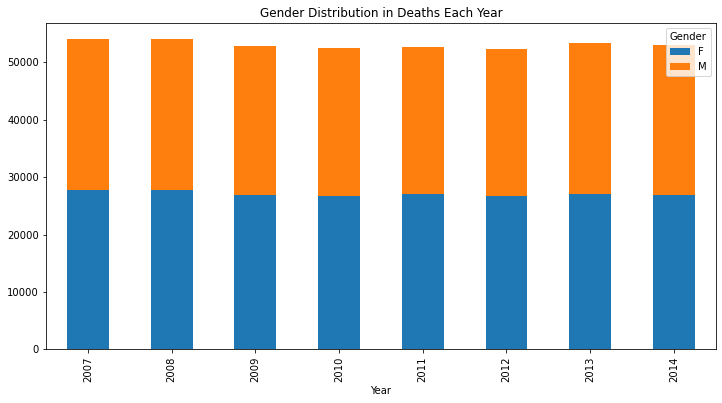

In [27]:
# Draw a stacked bar graph of each year showing Male/female proportion in total deaths
df2 = df1.groupby(['Year', 'Gender'])['Deaths'].sum().unstack('Gender')
df2[['F','M']].plot(kind='bar', stacked=True, title = "Gender Distribution in Deaths Each Year", figsize=(12,6))

This code creates a **grouped bar chart** to visually compare male and female death counts for each year. Using the `df2` DataFrame (which contains total deaths grouped by `"Year"` and separated by `"Gender"`), the `.plot.bar()` function generates side-by-side bars for each year, with one bar for females and one for males. The `width=0.55` parameter controls the thickness of the bars, while `figsize=(12,5)` sets the overall size of the plot for better visibility. The bars are colored green and red to distinguish between genders. The `.legend(bbox_to_anchor=(1.2, 0.5))` command positions the legend outside the main plot area, making it clearer and less cluttered. This grouped bar chart makes it easy to compare gender-specific death counts across multiple years.


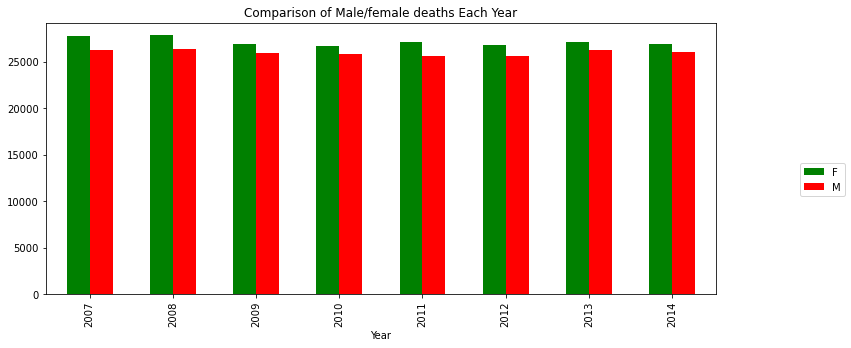

In [28]:
# Draw a GROUPED bar graph of each year showing the comparison of Male/female deaths each year
# width = .55 ------  sets the width of the bars 
# legend = False ---  Turns the Legend off
# figsize ----------  Sets size of plot in inches
# legend(bbox_to_anchor = (....)) --------- sets the position of the legend
df2.plot.bar(title = "Comparison of Male/female deaths Each Year", width=0.55, figsize=(12,5),color=["green","red"]).legend(bbox_to_anchor=(1.2, 0.5))


This code removes all rows from the DataFrame `df1` that contain `NaN` (missing values) in **any** column using the `dropna()` method. After the rows are dropped, the length of the new DataFrame is printed to show how much data remains. Then, it calculates the total number of deaths from the cleaned dataset.

However, dropping rows with **any missing values** can be a risky or inappropriate approach—especially for this dataset—because it might remove rows where only non-critical fields (like a category label or metadata) are missing, while still containing valid numeric death counts. This could lead to underreporting or misrepresentation of the actual data. In such cases, it's better to consider imputing missing values or selectively dropping only rows where essential data (like `"Deaths"`) is missing.

In [29]:
#dropping all rows with NaN in ANY column --- CAN BE A WRONG APPROACH FOR THIS DATASET
df1 = df1.dropna()

print("The length of df1 after dropping all rows that have NaN in ANY column is:", len(df1))

df1["Deaths"].sum()

The length of df1 after dropping all rows that have NaN in ANY column is: 708


418760.0

This code filters the dataset to extract only the rows where the `"Year"` column has the value **2010**. The result is stored in a new DataFrame called `df1_2010`, which contains all data entries specifically from the year 2010. This subset can then be used for focused analysis, such as identifying leading causes of death or demographic patterns during that particular year.

In [ ]:
#find the data related to 2010....
df1_2010 = df1[df1.Year == 2010]

## Acknowledgements

The Python code used in this notebook was originally written by Vandana Srivastava, AI/Data Science Specialist, University Libraries, USC.

Explanatory text, annotations, and additional instructional content were added by Meara Cox, USC 2026 Graduate.